# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shiqian
Processing Record 2 of Set 1 | shakawe
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | chonchi
Processing Record 5 of Set 1 | cat ba
City not found. Skipping...
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | enoch
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 12 of Set 1 | udachny
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | bubaque
Processing Record 15 of Set 1 | sebastopol
Processing Record 16 of Set 1 | afaahiti
Processing Record 17 of Set 1 | pangody
Processing Record 18 of Set 1 | skovde
City not found. Skipping...
Processing Record 19 of Set 1 | solleftea
Processing Record 20 of Set 1 | portland
Processing Record 21 of Set 1 | adamstown
P

Processing Record 40 of Set 4 | selfoss
Processing Record 41 of Set 4 | haimen
Processing Record 42 of Set 4 | cumaribo
City not found. Skipping...
Processing Record 43 of Set 4 | kodiak
Processing Record 44 of Set 4 | east london
Processing Record 45 of Set 4 | zuru
Processing Record 46 of Set 4 | hami
Processing Record 47 of Set 4 | orapa
Processing Record 48 of Set 4 | guerrero negro
Processing Record 49 of Set 4 | san antonio
Processing Record 0 of Set 5 | mimizan
Processing Record 1 of Set 5 | kamyanyets
Processing Record 2 of Set 5 | bulgan
Processing Record 3 of Set 5 | fauske
Processing Record 4 of Set 5 | kayangel
Processing Record 5 of Set 5 | ilulissat
Processing Record 6 of Set 5 | puerto ayora
Processing Record 7 of Set 5 | matozinhos
Processing Record 8 of Set 5 | port alfred
Processing Record 9 of Set 5 | wellington
Processing Record 10 of Set 5 | san pedro pochutla
Processing Record 11 of Set 5 | makoko
Processing Record 12 of Set 5 | karungdong
Processing Record 13 of 

Processing Record 33 of Set 8 | zaozersk
Processing Record 34 of Set 8 | ramban
Processing Record 35 of Set 8 | longgang
Processing Record 36 of Set 8 | gereshk
Processing Record 37 of Set 8 | birecik
Processing Record 38 of Set 8 | okhotsk
Processing Record 39 of Set 8 | kirovsk
Processing Record 40 of Set 8 | pierre
Processing Record 41 of Set 8 | mizan teferi
Processing Record 42 of Set 8 | bom jesus
Processing Record 43 of Set 8 | lenzkirch
Processing Record 44 of Set 8 | solwezi
Processing Record 45 of Set 8 | anshan
Processing Record 46 of Set 8 | rabo de peixe
Processing Record 47 of Set 8 | pisco
Processing Record 48 of Set 8 | samana
Processing Record 49 of Set 8 | port macquarie
Processing Record 0 of Set 9 | mbandaka
Processing Record 1 of Set 9 | dryden
Processing Record 2 of Set 9 | kulia village
City not found. Skipping...
Processing Record 3 of Set 9 | antofagasta
Processing Record 4 of Set 9 | pingliang
Processing Record 5 of Set 9 | morehead city
Processing Record 6 of

Processing Record 23 of Set 12 | 'alaqahdari dishu
Processing Record 24 of Set 12 | vilhena
Processing Record 25 of Set 12 | bairnsdale
Processing Record 26 of Set 12 | aldan
Processing Record 27 of Set 12 | wetaskiwin
Processing Record 28 of Set 12 | yanchep
Processing Record 29 of Set 12 | urucui
Processing Record 30 of Set 12 | bengkulu
Processing Record 31 of Set 12 | cide
Processing Record 32 of Set 12 | north battleford
Processing Record 33 of Set 12 | egilsstadir
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shiqian,27.5225,108.2281,279.86,90,100,1.52,CN,1702329601
1,shakawe,-18.3667,21.8500,296.58,62,39,2.56,BW,1702329601
2,margaret river,-33.9500,115.0667,287.73,74,0,3.95,AU,1702329360
3,chonchi,-42.6128,-73.8092,286.71,94,100,2.02,CL,1702329414
4,blackmans bay,-43.0167,147.3167,287.22,89,21,0.45,AU,1702329603


In [10]:
# Export the City_Data into a csv
import os

# Define the output directory
output_dir = "output_data"

# Check if the directory exists, and create it if not
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the City_Data into a csv
city_data_df.to_csv(os.path.join(output_dir, "cities.csv"), index_label="City_ID")



In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shiqian,27.5225,108.2281,279.86,90,100,1.52,CN,1702329601
1,shakawe,-18.3667,21.8500,296.58,62,39,2.56,BW,1702329601
2,margaret river,-33.9500,115.0667,287.73,74,0,3.95,AU,1702329360
3,chonchi,-42.6128,-73.8092,286.71,94,100,2.02,CL,1702329414
4,blackmans bay,-43.0167,147.3167,287.22,89,21,0.45,AU,1702329603


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

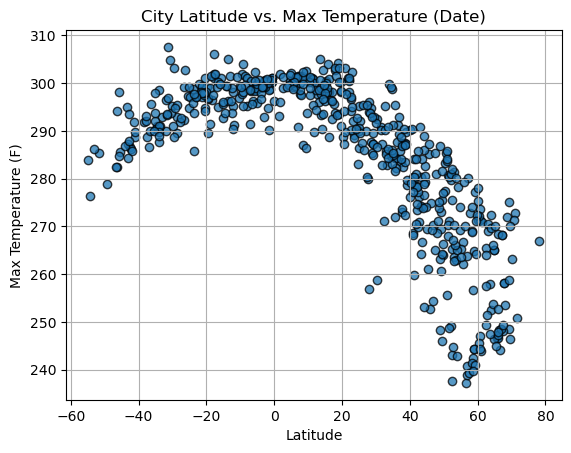

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

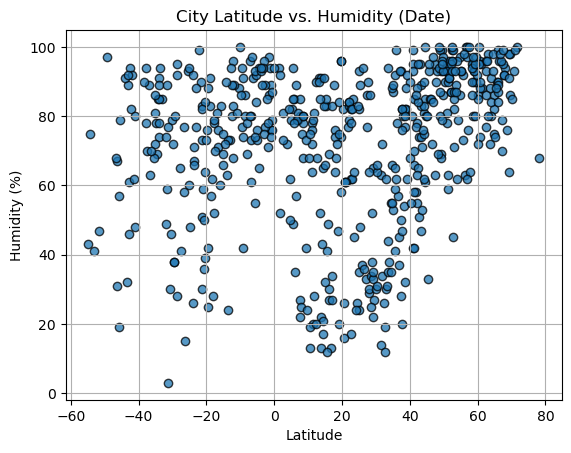

In [13]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

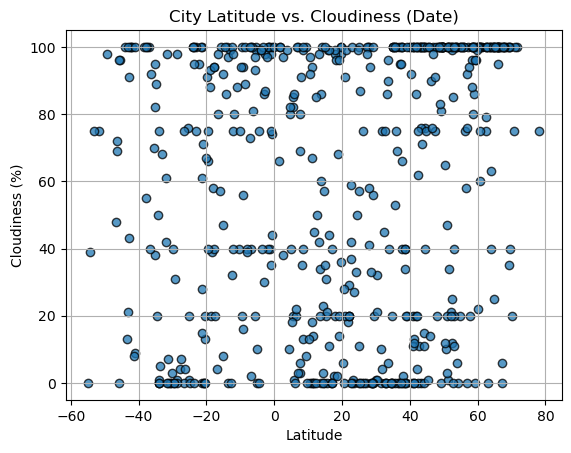

In [14]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

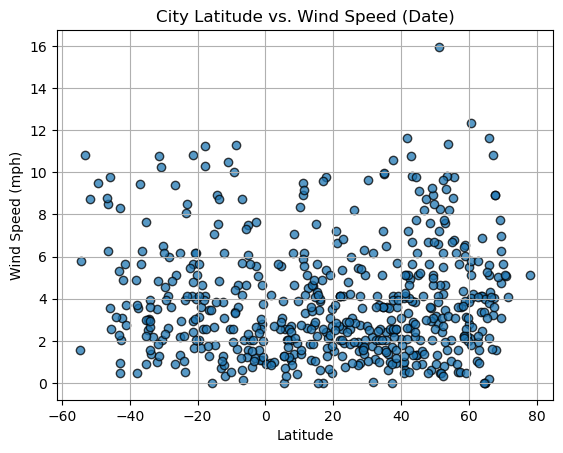

In [15]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
from scipy.stats import linregress

def plot_linear_regression(x, y, title, xlabel, ylabel, label_position, output_file):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    # Calculate the regression line
    regress_values = x * slope + intercept

    # Create a scatter plot
    plt.scatter(x, y, edgecolors="black", alpha=0.75)

    # Plot the regression line
    plt.plot(x, regress_values, "r-", label="y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2)))

    # Annotate the linear regression equation on the plot
    plt.annotate(f"Linear Regression:\n{label_position}y = {round(slope, 2)}x + {round(intercept, 2)}\nR-squared: {round(rvalue**2, 2)}", 
                 xy=(0.2, 0.1), xycoords='axes fraction', fontsize=10, color="red")

    # Label plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Display the plot
    plt.legend()
    plt.savefig(output_file)
    plt.show()

# Example usage:
# plot_linear_regression(city_data_df["Lat"], city_data_df["Max Temp"], "City Latitude vs. Max Temperature", "Latitude", "Max Temperature (F)", "Max Temp", "output_data/LinearRegression_MaxTemp.png")


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shiqian,27.5225,108.2281,279.86,90,100,1.52,CN,1702329601
5,talnakh,69.4865,88.3972,246.50,98,100,4.74,RU,1702329604
6,enoch,37.7733,-113.0244,287.12,20,0,4.12,US,1702329604
7,bethel,41.3712,-73.4140,278.45,66,100,5.14,US,1702329605
8,yellowknife,62.4560,-114.3525,249.44,77,75,1.03,CA,1702329309


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,shakawe,-18.3667,21.8500,296.58,62,39,2.56,BW,1702329601
2,margaret river,-33.9500,115.0667,287.73,74,0,3.95,AU,1702329360
3,chonchi,-42.6128,-73.8092,286.71,94,100,2.02,CL,1702329414
4,blackmans bay,-43.0167,147.3167,287.22,89,21,0.45,AU,1702329603
13,afaahiti,-17.7500,-149.2833,301.08,78,94,10.32,PF,1702329607


###  Temperature vs. Latitude Linear Regression Plot

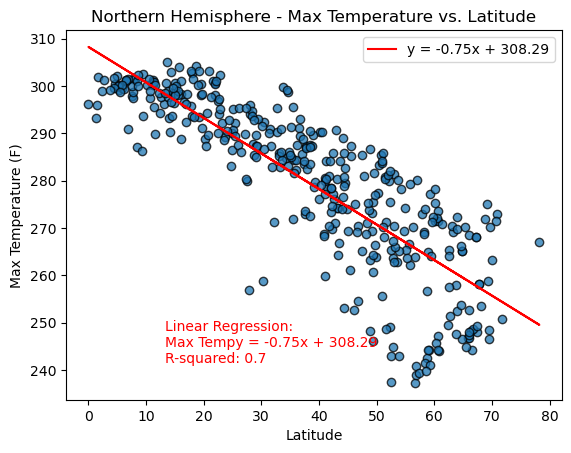

In [19]:
# Linear regression on Northern Hemisphere - Max Temperature
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Northern Hemisphere - Max Temperature vs. Latitude", "Latitude", "Max Temperature (F)", "Max Temp", "output_data/NorthernHemisphere_LinearRegression_MaxTemp.png")


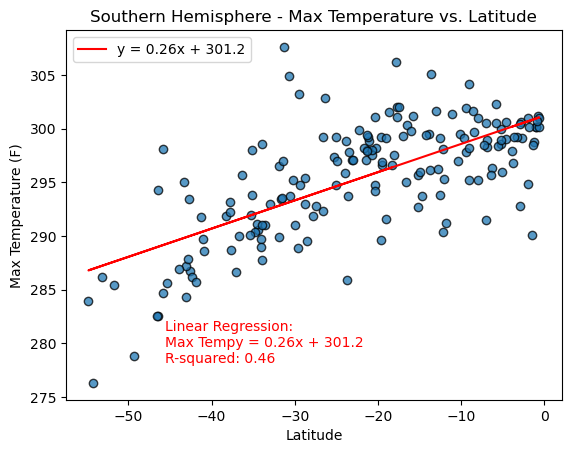

In [20]:
# Linear regression on Southern Hemisphere - Max Temperature
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Southern Hemisphere - Max Temperature vs. Latitude", "Latitude", "Max Temperature (F)", "Max Temp", "output_data/SouthernHemisphere_LinearRegression_MaxTemp.png")


**Discussion about the linear relationship:** Northern Hemisphere: There appears to be a negative correlation between latitude and max temperature, indicating that as you move further north, the temperature tends to decrease.
Southern Hemisphere: There is a positive correlation between latitude and max temperature, suggesting that as you move closer to the equator, temperatures generally increase.

### Humidity vs. Latitude Linear Regression Plot

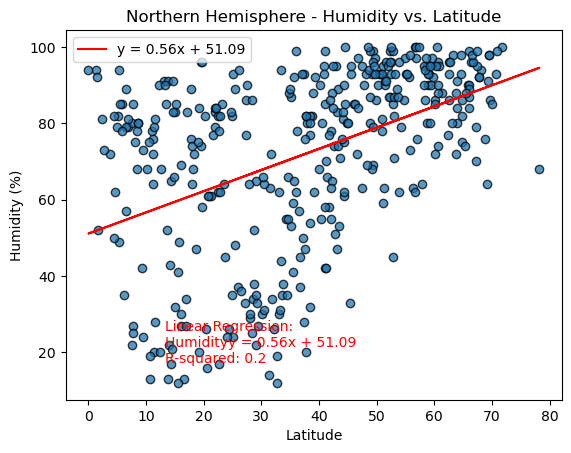

In [21]:
# Linear regression on Northern Hemisphere - Humidity
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Northern Hemisphere - Humidity vs. Latitude", "Latitude", "Humidity (%)", "Humidity", "output_data/NorthernHemisphere_LinearRegression_Humidity.png")


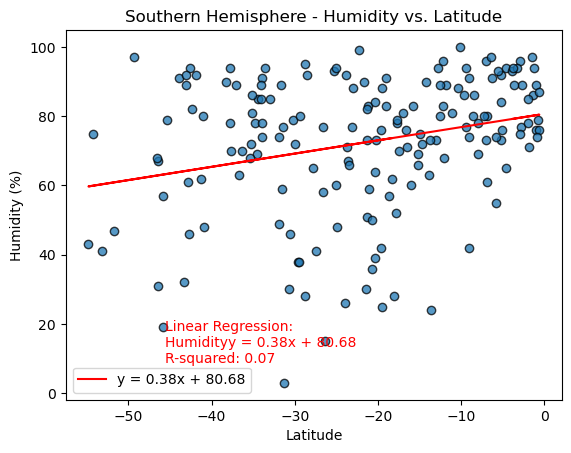

In [22]:
# Linear regression on Southern Hemisphere - Humidity
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Southern Hemisphere - Humidity vs. Latitude", "Latitude", "Humidity (%)", "Humidity", "output_data/SouthernHemisphere_LinearRegression_Humidity.png")


**Discussion about the linear relationship:** orthern Hemisphere: There is no strong linear relationship between latitude and humidity. Humidity levels vary across different latitudes.
Southern Hemisphere: Similar to the Northern Hemisphere, there is no clear linear trend between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

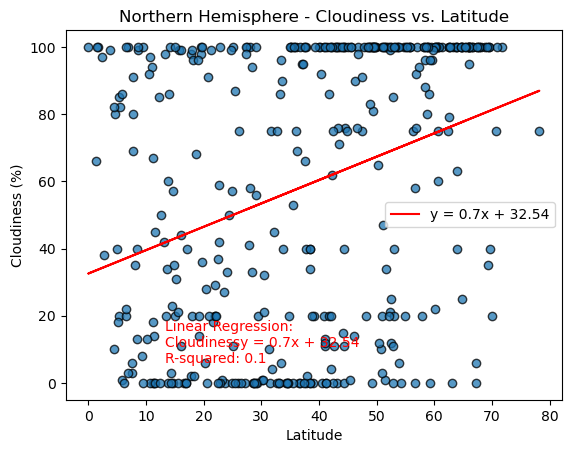

In [23]:
# Linear regression on Northern Hemisphere - Cloudiness
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Northern Hemisphere - Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)", "Cloudiness", "output_data/NorthernHemisphere_LinearRegression_Cloudiness.png")


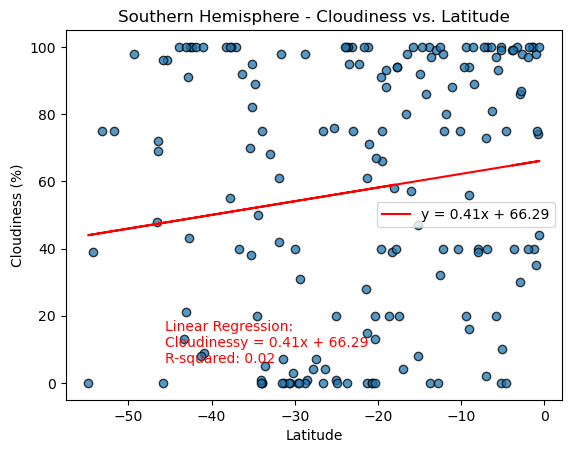

In [24]:
# Linear regression on Southern Hemisphere - Cloudiness
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Southern Hemisphere - Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)", "Cloudiness", "output_data/SouthernHemisphere_LinearRegression_Cloudiness.png")


**Discussion about the linear relationship:** Northern Hemisphere: There is no apparent linear relationship between latitude and cloudiness. Cloudiness seems to be evenly distributed across different latitudes.
Southern Hemisphere: Cloudiness also shows no significant linear trend with latitude.

### Wind Speed vs. Latitude Linear Regression Plot

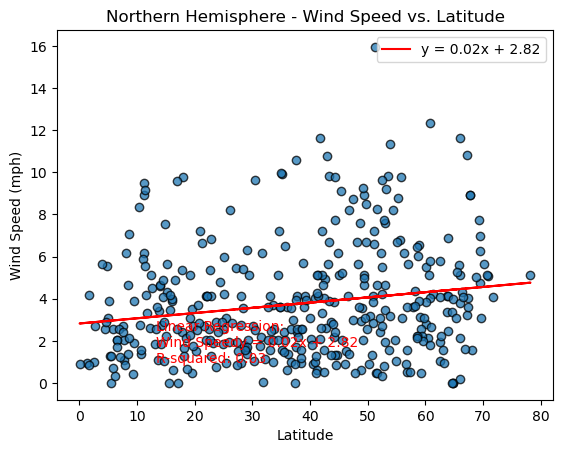

In [25]:
# Linear regression on Northern Hemisphere - Wind Speed
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Northern Hemisphere - Wind Speed vs. Latitude", "Latitude", "Wind Speed (mph)", "Wind Speed", "output_data/NorthernHemisphere_LinearRegression_WindSpeed.png")


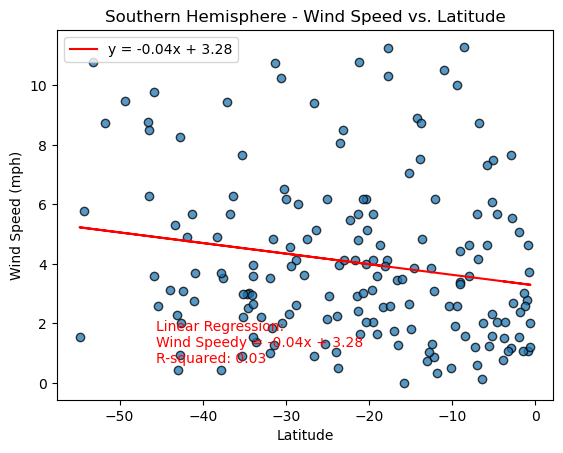

In [26]:
# Linear regression on Southern Hemisphere - Wind Speed
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Southern Hemisphere - Wind Speed vs. Latitude", "Latitude", "Wind Speed (mph)", "Wind Speed", "output_data/SouthernHemisphere_LinearRegression_WindSpeed.png")


**Discussion about the linear relationship:** Northern Hemisphere: There is no strong linear relationship between latitude and wind speed. Wind speeds vary across different latitudes.
Southern Hemisphere: Similar to the Northern Hemisphere, there is no clear linear trend between latitude and wind speed.